# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [1]:
#import liberary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [122]:
#some function to plot the data
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()



In [3]:
#read the data to be in numpy array 
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [4]:
print(data)
#see the shape of it 
print(data.shape )#m *n

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
(25, 4)


In [5]:
#assign  y and  x from the  data  
X = data[:, 0:-1]
y = data[:, -1]
#seeing shape of them 
print(X.shape)
print(y.shape)


(25, 3)
(25,)


Text(0.5, 0, 'y')

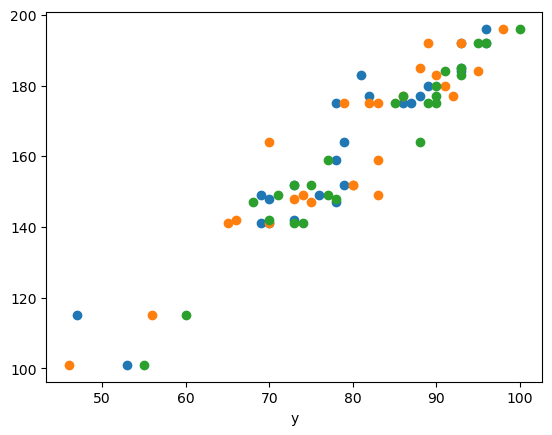

In [6]:
#ploting the original data 
plt.scatter(data[:, 0],y)
plt.scatter(data[:, 1],y)
plt.scatter(data[:, 2],y)
plt.xlabel('X')
plt.xlabel('y')

In [202]:
def batch_ADAM(x, y, alpha=0.01, epochs=100, b1=0.9, b2=0.999, eps=1e-8):
    X = np.concatenate((np.ones(x.shape[0])[:, np.newaxis], x), axis=1)
    n_samples, n_features = X.shape
    batch=len(x)
    
    theta = np.zeros(n_features)
    theta_hist=np.zeros((n_features))
    
    m_t = np.zeros(n_features)
    v_t = np.zeros(n_features)
    
    cost_epoch=[]
    shuffle = np.random.permutation(n_samples)
    X = X[shuffle]
    y = y[shuffle]
    for epoch in range(epochs):
        #theta_hist.append(theta)
        theta_hist=np.vstack((theta_hist,theta))
        X_batch = X
        y_batch = y
        y_pred = np.dot(X_batch, theta)
        error = y_pred - y_batch
        cost = np.sum(error ** 2) / (2 * batch)
        d_theta = np.dot(X_batch.T, error) / batch
        m_t = b1 * m_t + (1 - b1) * d_theta
        v_t = b2 * v_t + (1 - b2) * (d_theta ** 2)
        m_t_hat = m_t / (1 - b1 )
        v_t_hat = v_t / (1 - b2 )
        theta -= ((alpha * m_t_hat) / (np.sqrt(v_t_hat)) + eps)
#         print("the theta hist")
#         print(theta_hist)
        #append to the cost per epoch
        cost_epoch.append(cost)
#         print("theta ")
        
#         print(theta)
        if epoch > 0:
            if  np.linalg.norm(d_theta)<.001 or abs(cost_epoch[-1] - cost_epoch[-2]) < 0.001:
                y_pred = np.dot(X, theta)
                break
            y_pred = np.dot(X, theta)
#     z=np.array([theta_hist]) 
#     print(theta_hist)
#     print("debug")

#     print(np.array(theta_hist)[:,0])  
    print("---------------------------------")      
    print("Epochs: ",epoch+1,'\n')
    print("gredient vector: ",d_theta,'\n')
    print("y_predict: ",y_pred,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_pred),"\n")
    plt.plot(cost_epoch,".b-")
    plt.xlabel("Epocs", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
#     for i in range(len(cost_epoch)):
#         plot_theta_loss(theta_hist[i][0] ,cost_epoch[i] , 0.01, "theta")
    #plot_theta_loss(z[:,1],cost_epoch, 0.01, "theta")  
    #plt.plot(theta_hist[:-1,0], cost_epoch, marker='o')
    #plot_theta_loss(theta_hist[:,0].squeeze(), cost_epoch, alpha, f'theta {0}')
    for i in range(theta_hist.squeeze().shape[1]):
        plot_theta_loss(theta_hist[1:,i].squeeze(), cost_epoch, alpha, f'theta {i}')
    plt.show()
    

the theta hist
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
theta 
[0.00999999 0.00999999 0.00999999 0.00999999]
the theta hist
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00999999 0.00999999 0.00999999 0.00999999]]
theta 
[0.02343274 0.02343274 0.02343274 0.02343275]
the theta hist
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00999999 0.00999999 0.00999999 0.00999999]
 [0.02343274 0.02343274 0.02343274 0.02343275]]
theta 
[0.03906579 0.03906579 0.03906579 0.03906582]
the theta hist
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00999999 0.00999999 0.00999999 0.00999999]
 [0.02343274 0.02343274 0.02343274 0.02343275]
 [0.03906579 0.03906579 0.03906579 0.03906582]]
theta 
[0.05622448 0.05622447 0.05622447 0.05622455]
the theta hist
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00999999 0.009999

the theta hist
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00999999 0.00999999 0.00999999 0.00999999]
 [0.02343274 0.02343274 0.02343274 0.02343275]
 [0.03906579 0.03906579 0.03906579 0.03906582]
 [0.05622448 0.05622447 0.05622447 0.05622455]
 [0.07446396 0.07446394 0.07446393 0.07446412]
 [0.09346371 0.09346366 0.09346365 0.09346402]
 [0.1129806  0.11298051 0.11298049 0.11298113]
 [0.13282399 0.13282385 0.13282381 0.13282484]
 [0.15284101 0.1528408  0.15284073 0.15284231]
 [0.17290708 0.17290677 0.17290667 0.17290897]
 [0.19291953 0.1929191  0.19291895 0.19292218]
 [0.21279304 0.21279245 0.21279226 0.21279664]
 [0.23245635 0.23245557 0.23245531 0.23246112]
 [0.25184972 0.25184871 0.25184838 0.2518559 ]
 [0.27092303 0.27092175 0.27092132 0.27093089]
 [0.28963425 0.28963265 0.28963212 0.28964408]
 [0.30794824 0.30794627 0.30794561 0.30796036]
 [0.32583577 0.32583336 0.32583256 0.3258505 ]
 [0.3432727  0.34326981 0.34326885 0.34329041

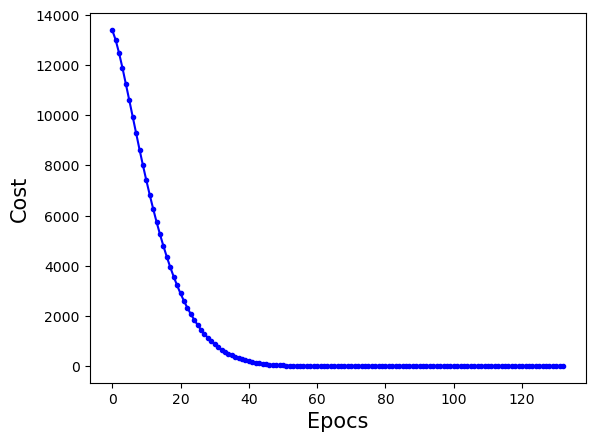

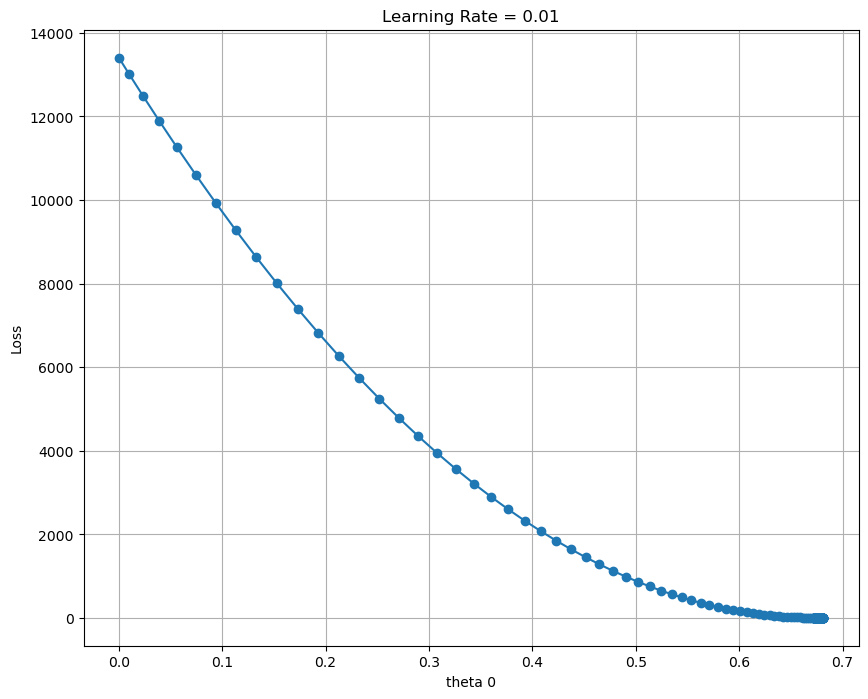

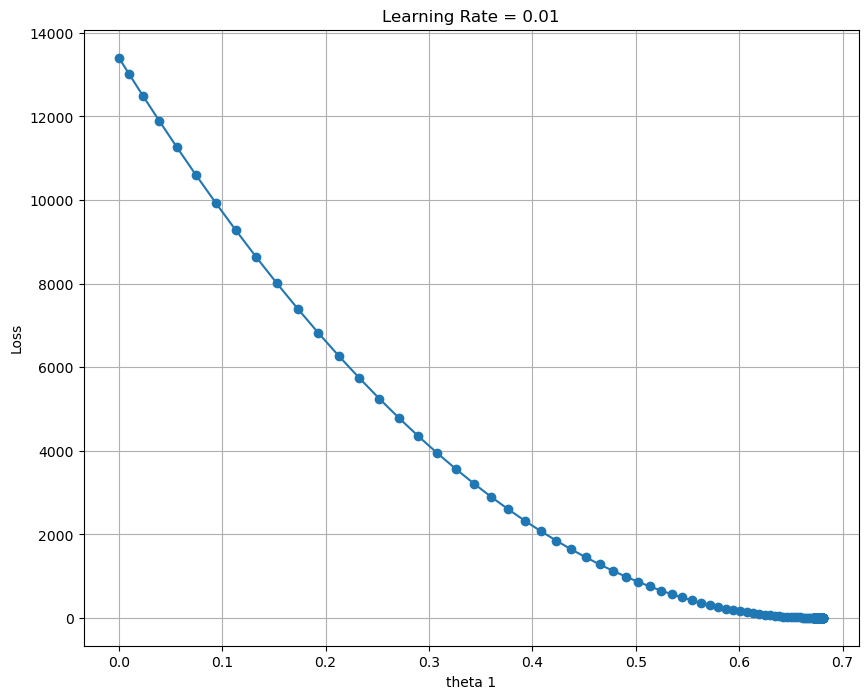

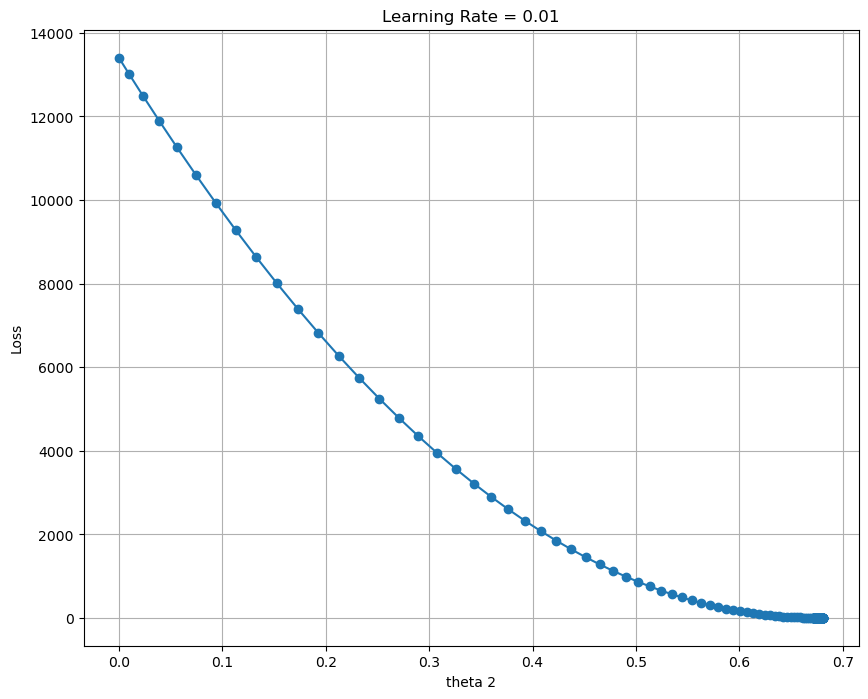

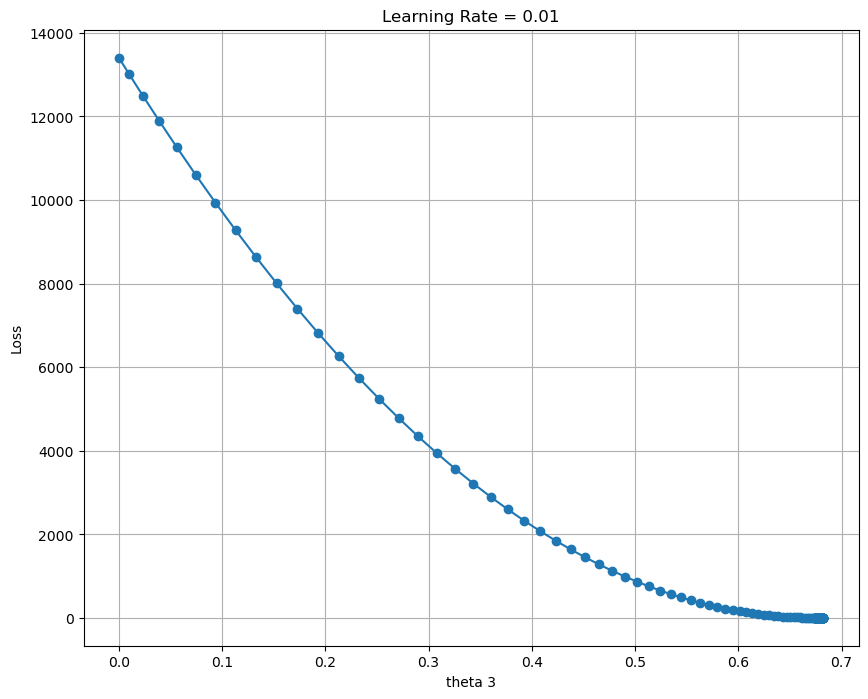

In [203]:
batch_ADAM(X, y, alpha=0.01, epochs=500, b1=0.9, b2=0.999, eps=1e-8)

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

(25, 3)
(25, 4)
Number of iterations: 499
----------------------------
thetas : 
 [[-4.285824  ]
 [ 0.34945918]
 [ 0.54881022]
 [ 1.15460246]]
----------------------------
Error Vector:
 [[-0.28421613]
 [-1.12484183]
 [ 0.66078629]
 [ 2.49338628]
 [-3.74081262]
 [ 1.97674611]
 [ 0.33391182]
 [-2.85851488]
 [-1.6244864 ]
 [-0.66844569]
 [ 1.52052576]
 [ 0.2800234 ]
 [ 1.40832905]
 [-0.49679921]
 [ 2.28890453]
 [-4.11254982]
 [-4.36292552]
 [-2.21981912]
 [-0.75762467]
 [-1.58168065]
 [-1.5293387 ]
 [-1.48173158]
 [-8.34589868]
 [ 0.79269539]
 [-2.02334629]]
----------------------------
y_predict:
 [[151.71578387]
 [183.87515817]
 [180.66078629]
 [198.49338628]
 [138.25918738]
 [102.97674611]
 [149.33391182]
 [112.14148512]
 [173.3755136 ]
 [163.33155431]
 [142.52052576]
 [141.2800234 ]
 [185.40832905]
 [151.50320079]
 [150.28890453]
 [187.88745018]
 [142.63707448]
 [180.78018088]
 [176.24237533]
 [157.41831935]
 [175.4706613 ]
 [173.51826842]
 [166.65410132]
 [149.79269539]
 [189.976653

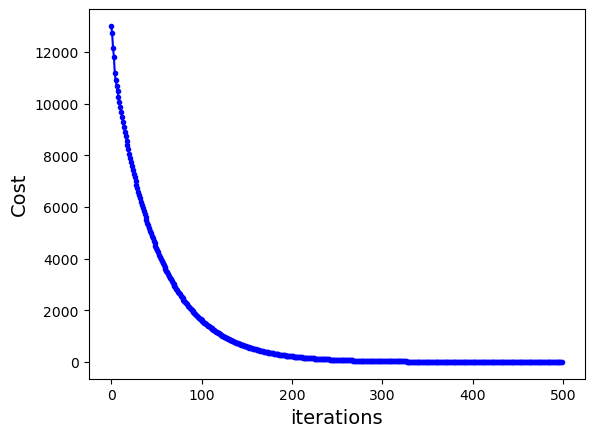

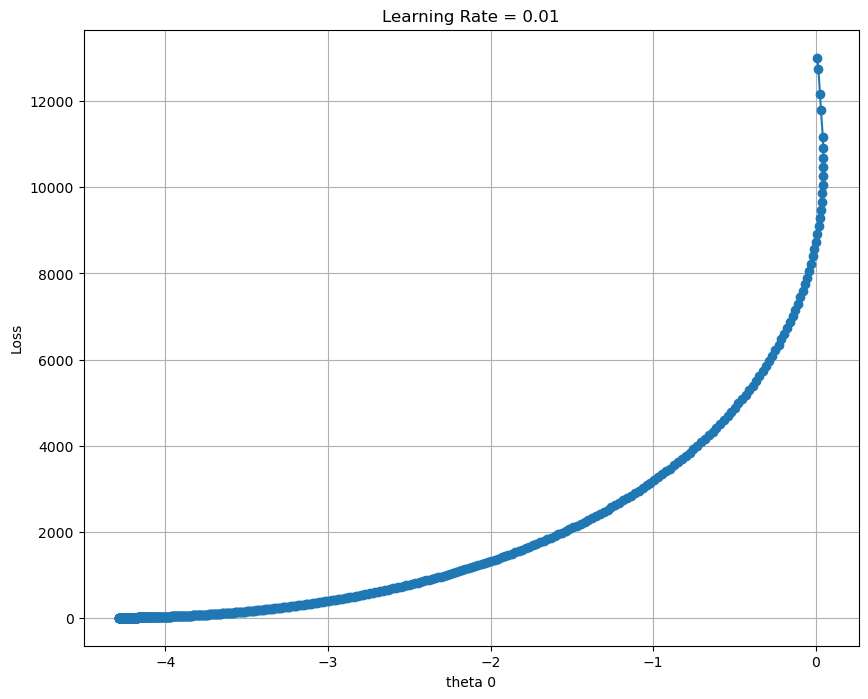

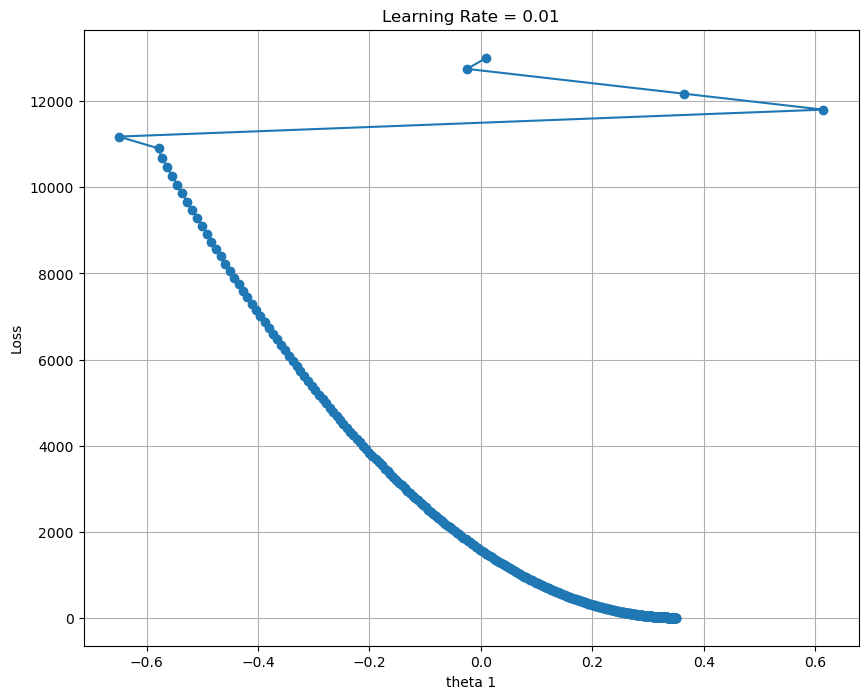

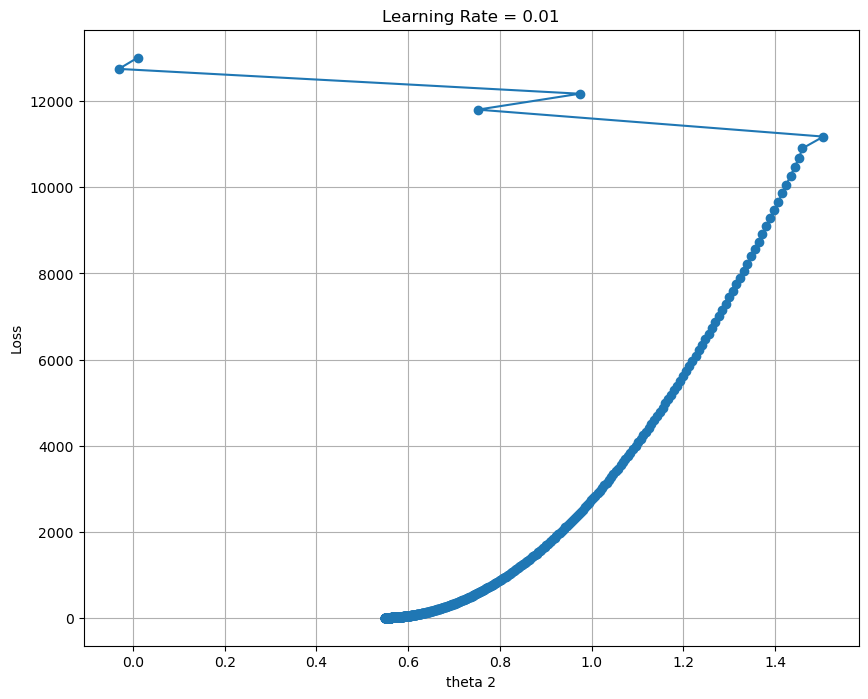

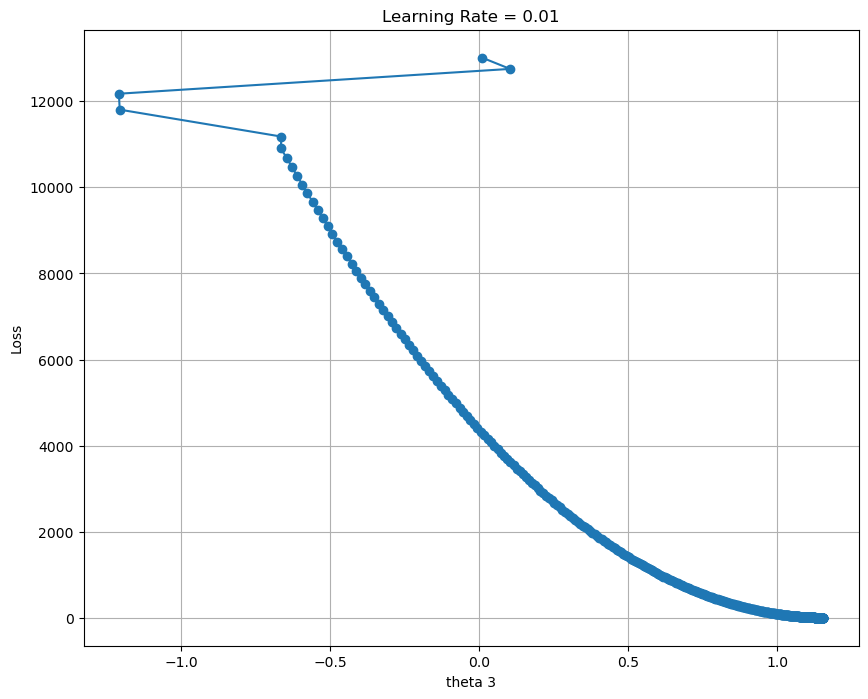

IndexError: index 4 is out of bounds for axis 0 with size 4

In [228]:
def BFGS_multi_var(data , alpha, itr):
    x=data[:,:-1]
    y=data[:,-1]
    y = y.reshape(len(y), 1) #25*2
    print(x.shape)
    X = np.concatenate((np.ones(x.shape[0])[:, np.newaxis], x), axis=1)#append bias
    
    print(X.shape) #we add a column bais
    n_features = X.shape[1]#n
    theta_zero = np.zeros((n_features, 1))#n*1
    theta= np.array(n_features * [[0.01]]) #n*1
    
    theta_hist=np.zeros((n_features))
    
    theta_log= np.zeros((n_features, 1))
   
    identity_mat=np.eye(n_features)
    b_inv=np.eye(n_features)
    
    cost=[]
    
    thetas_history = [theta_zero]
    pred_history= [np.dot(X, theta_zero)]
    error_history= [(pred_history[0] - y)]
    d_theta_history= [np.dot(X.T, error_history[0]) / len(X)]
    
    for i in range(itr):
        thetas_history.append(theta)
        #print("theta log")
        #print(theta_log)
        theta_log=np.hstack((theta_log,theta))
        pred= np.dot(X, theta)
#         print("the prediction" )
#         print(pred)
        pred_history.append(pred)
#         print("pred history" )
#         print(pred_history)
        error= pred - y
        #cost 
        dj= np.linalg.norm(error)**2 / (2*len(X))
        cost.append(dj.squeeze())
        d_theta= np.dot(X.T, error) / len(X)
        d_theta_history.append(d_theta)
#         print("thetas history ---")
#         print(thetas_history)
#         print(len(thetas_history))
#         print("thetas history [-2]")
#         print(thetas_history[-2])
#         print("dtheta")
#         print(d_theta)
        delta_x = theta - thetas_history[-2]
        delta_y = d_theta - d_theta_history[-2]
        b_inv = (identity_mat - ((delta_x @ delta_y.T) / (delta_y.T @ delta_x))) @ b_inv @ (identity_mat -((delta_y @ delta_x.T) / (delta_y.T @ delta_x))) + ((delta_x @ delta_x.T) / (delta_y.T @ delta_x))
        
        theta = theta - alpha * (b_inv @ d_theta)
        if abs(np.linalg.norm(d_theta)) <= 0.000001:
               break
    print(f'Number of iterations: {i}')
    print("----------------------------")
    print('thetas : \n', theta)
    print("----------------------------")
    print('Error Vector:\n', error)
    print("----------------------------")
    print('y_predict:\n', pred)
    print("----------------------------")
    print('y_actual:\n', y)
    print("----------------------------")
    print("Accuracy: " ,r2_score(y,pred))
    
    plt.plot(cost,".b-")
    plt.xlabel("iterations", fontsize = 14)
    plt.ylabel("Cost",fontsize = 14)
    #print(theta_log)
    for i in range(theta_log.squeeze().shape[1]):
        plot_theta_loss(theta_log[i,1:], cost, alpha, f'theta {i}')
        
    plt.show()
    
    

        
        
        
BFGS_multi_var(data , 0.01, 500)


## The diffrence between ADAM ,BFGS 
the adam is slower than BFGS 
and bfgs is converge faster and work with less data and need convex function ,manily most of people using it when they know the curvature of cost function because it can be stuck in the saddle point
but adam is widely use in the deep learning because there are alot of saddle point and you dont know what there are ,it have much chance to escape from it.   